## Chapter 5, Question 8

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### We will now perform cross-validation on a simulated data set.

### a. (a) Generate a simulated data set as follows:

In [46]:
rng = np.random.default_rng(seed=1)
x = rng.random(100)
y = x - 2 * x**2 + rng.normal(size=100)

### In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [47]:
# Assuming the provided code snippet is executed in the current environment.
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
# n is the number of observations (data points)
n = len(x)
print(f"n = {n}")

# p is the number of predictors (independent variables). In this case, there's only one predictor, x.
p = 1
print(f"p = {p}")
print("Model: y = x - 2x^2 + ε")

n = 100
p = 1
Model: y = x - 2x^2 + ε


### The model used to generate the data is:
### y = x - 2x^2 + ε
### where:
*   y is the response variable
*   x is the predictor variable
*   ε (epsilon) represents random noise drawn from a normal distribution (Gaussian noise)




### (b) Create a scatterplot of X against Y . Comment on what you fnd.

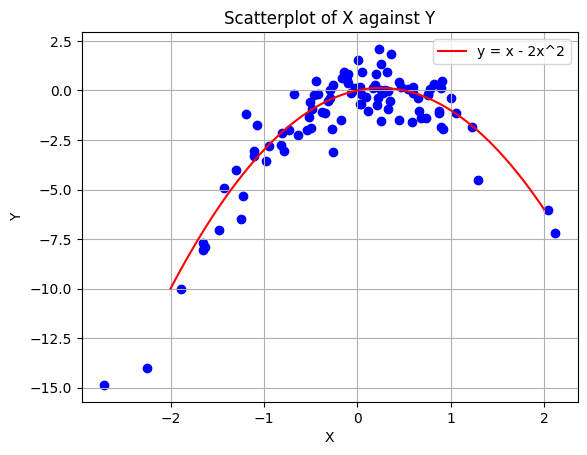

In [48]:
# Create a scatterplot of X against Y
plt.scatter(x, y, color = 'blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X against Y")
plt.grid(True)


# Draw the function y = x - 2x^2 on the scatterplot
x_func = np.linspace(-2, 2, 100)
y_func = x_func - 2 * (x_func ** 2)
plt.plot(x_func, y_func, color='red', label='y = x - 2x^2')
plt.legend()
plt.show()

The scatterplot shows a **quadratic relationship** between X and Y.  As X increases from 0, Y initially increases, reaches a bottom, and then decreases.

The presence of random noise (epsilon) causes some scatter around this general quadratic trend.  The relationship isn't perfectly quadratic, but the overall pattern is evident.

### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
### i. Y = β0 + β1X + ε
### ii. Y = β0 + β1X + β2X2 + ε
### iii. Y = β0 + β1X + β2X2 + β3X3 + ε
### iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ε.
### Note you may fnd it helpful to use the data.frame() function to create a single data set containing both X and Y .

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Create a DataFrame for easier handling
df = pd.DataFrame({'X': x, 'Y': y})

# Function to perform LOOCV
def loocv(df, degree):
    n = len(df)
    loo_errors = []
    for i in range(n):
        # Split data into training and validation sets
        X_train = df.drop(index=i)['X'].values.reshape(-1, 1)
        y_train = df.drop(index=i)['Y'].values
        X_val = df.iloc[[i]]['X'].values.reshape(-1, 1)
        y_val = df.iloc[[i]]['Y'].values

        # Create polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=True)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predict and calculate error
        y_pred = model.predict(X_val_poly)
        error = mean_squared_error(y_val, y_pred)
        loo_errors.append(error)

    return np.mean(loo_errors)

# Calculate LOOCV errors for different models
degrees = [1, 2, 3, 4]
loocv_errors = [loocv(df, degree) for degree in degrees]

# Print the results
for i, degree in enumerate(degrees):
    print(f"LOOCV error for model with degree {degree}: {loocv_errors[i]}")

# (d) Which of the models in (c) had the smallest LOOCV error? Is this what you expected?
#  Compare the LOOCV errors and determine which model has the smallest error.
#  Based on how the data was generated, the model with degree 2 is likely to have the lowest error.
min_error = min(loocv_errors)
min_error_degree = degrees[loocv_errors.index(min_error)]

print(f"\nModel with the smallest LOOCV error: Degree {min_error_degree} (Error: {min_error})")

LOOCV error for model with degree 1: 6.633029839181984
LOOCV error for model with degree 2: 1.122936856341969
LOOCV error for model with degree 3: 1.3017965489358863
LOOCV error for model with degree 4: 1.3323942694179336

Model with the smallest LOOCV error: Degree 2 (Error: 1.122936856341969)


### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [50]:
rng = np.random.default_rng(2)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

df = pd.DataFrame({'X': x, 'Y': y})
loocv_errors = [loocv(df, degree) for degree in degrees]

# Print the results
for i, degree in enumerate(degrees):
    print(f"LOOCV error for model with degree {degree}: {loocv_errors[i]}")

#  Compare the LOOCV errors and determine which model has the smallest error.
#  Based on how the data was generated, the model with degree 2 is likely to have the lowest error.
min_error = min(loocv_errors)
min_error_degree = degrees[loocv_errors.index(min_error)]

print(f"\nModel with the smallest LOOCV error: Degree {min_error_degree} (Error: {min_error})")

LOOCV error for model with degree 1: 7.560603694358579
LOOCV error for model with degree 2: 0.9840371744582587
LOOCV error for model with degree 3: 0.9682355765918607
LOOCV error for model with degree 4: 0.9659585554875687

Model with the smallest LOOCV error: Degree 4 (Error: 0.9659585554875687)


No, the results are different from (c) due to different random seed value. However, we notice that the LOOCV error of models with degree 2, 3, 4 in both (c) and (d) are similar.

For **deterministic models with no inherent randomness**, the random seed should have **no effect** on LOOCV error.

For **non-deterministic or stochastic models**, changing the random seed could cause **slight fluctuations in the LOOCV error**, but these variations are usually minor unless the model is very sensitive to initialization.

### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

Model with degree 2 has the smallest LOOCV error.
Since the data was generated by a quadratic equation, it is expected that the degree 2 model would provide the best fit with the lowest LOOCV error.

### (f) Comment on the statistical signifcance of the coeffcient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [51]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

# Use the original data with seed 1 since (f) asked for results of (c)
rng = np.random.default_rng(seed=1)
x = rng.random(100)
y = x - 2 * x**2 + rng.normal(size=100)
df = pd.DataFrame({'X': x, 'Y': y})

stat_signif = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[['X']])
    model = OLS(df['Y'], X_poly).fit()
    print(f"\nModel with degree {degree}:")
    print(model.summary())
    if any(model.pvalues[1:] < 0.05):
        stat_signif.append(degree)

print("\nWith threshold=0.05, ")
for degree in stat_signif:
    print(f"\nModel with degree {degree} is statistically significant.")



Model with degree 1:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     7.693
Date:                Sun, 10 Nov 2024   Prob (F-statistic):            0.00664
Time:                        15:41:54   Log-Likelihood:                -142.17
No. Observations:                 100   AIC:                             288.3
Df Residuals:                      98   BIC:                             293.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2642      0.2

* With setting threshold as 0.05 and determine the statistically significane by p-values, model with degree 1 and 3 are statistically significant.

* If the lowest LOOCV error corresponds to the degree 2 model, and the degree 2 model has significant coefficients, this suggests that adding further complexity is unnecessary. However, these results disagree with the conclusions drawn based on the cross-validation results, since model with degree 2 has the lowest LOOCV error but model with degree 1 and 3 are statistically significant.
